### **Projekt zaliczeniowy z przedmiotu "Programowanie w języku Python"**

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Pobranie zbioru danych
Dane pobieram za pomocą biblioteki yfinance, która umożliwia pozyskiwanie danych finansowych ze strony finance.yahoo.com.

W tym przypadku zbieram dane dotyczące złota (GC-F), srebra (SI-F) oraz kawy (KC-F) od 1 września 2023 roku do 10 czerwca 2024 roku.

W ramce danych umieszczam kolumnę zawierającą wartości kursu zamknięcia (Close), czyli notowanie na końcu dnia handlowego dla wszystkich aktywów.

Ten kod służy do pobrania danych z Yahoo Finance dla złota (GC=F), srebra (SI=F) i kawy (KC=F) w zakresie od 1 września 2023 do 10 czerwca 2024.  
W praktyce nie musimy już wykorzystywać poniższych kodów – dane zostały wcześniej pobrane i zapisane do pliku `dane.csv`.  
Można je teraz wygodnie wczytać z pliku, bez ponownego pobierania z internetu.
``` python
gold = yf.download("GC=F", start='2023-09-01', end='2024-06-10')
silver = yf.download("SI=F", start='2023-09-01', end='2024-06-10')
coffee = yf.download("KC=F", start='2023-09-01', end='2024-06-10')

data = pd.DataFrame({
    'gold': gold['Close'].squeeze(),
    'silver': silver['Close'].squeeze(),
    'coffee': coffee['Close'].squeeze()
})

data = data.dropna()

data.to_csv('dane.csv')

In [2]:
data = pd.read_csv('dane.csv', index_col=0, parse_dates=True)

In [3]:
data.head()

,gold,silver,coffee
Date,,,
2023-09-01,1939.800049,24.232000,150.949997
2023-09-05,1926.199951,23.558001,151.399994
2023-09-06,1918.099976,23.205999,151.750000
2023-09-07,1917.500000,22.950001,147.399994
2023-09-08,1918.400024,22.892000,146.250000


In [13]:
data.describe(include='all').round(6)

,gold,silver,coffee
count,193.000000,193.000000,193.000000
mean,2092.011392,24.620404,188.135492
std,164.469857,2.634101,24.121009
min,1816.599976,20.848000,145.399994
25%,1981.599976,22.808001,174.350006
50%,2031.500000,23.579000,190.100006
75%,2236.500000,25.499001,200.100006
max,2433.899902,32.205002,247.949997


In [16]:
print("Wartości dla złota: \n")
print('Wartość średnia: %.4f' %data.gold.mean())
print("Wartość maksymalna: %.4f" %data.gold.max())
print("Wartość minimalna: %.4f" %data.gold.min())
print("Odchylenie standardowe: %.4f" %data.gold.std())
print('Wariancja: %.4f' %data.gold.var())
print('Skośność: %.4f' %st.skew(data.gold))
print('Kurtoza: %.3f' %st.kurtosis(data.gold))
print('Kwantyl rzędu 0.25: %.4f' %np.quantile(data.gold, q=0.25))
print('Kwantyl rzędu 0.5: %.4f' %np.quantile(data.gold, q=0.5))
print('Kwantyl rzędu 0.75: %.4f' %np.quantile(data.gold, q=0.75))
print("\n")

Wartości dla złota: 

Wartość średnia: 2092.0114
Wartość maksymalna: 2433.8999
Wartość minimalna: 1816.6000
Odchylenie standardowe: 164.4699
Wariancja: 27050.3339
Skośność: 0.5544
Kurtoza: -0.947
Kwantyl rzędu 0.25: 1981.6000
Kwantyl rzędu 0.5: 2031.5000
Kwantyl rzędu 0.75: 2236.5000




In [17]:
print("Wartości dla srebra: \n")
print('Wartość średnia: %.4f' %data.silver.mean())
print("Wartość maksymalna: %.4f" %data.silver.max())
print("Wartość minimalna: %.4f" %data.silver.min())
print("Odchylenie standardowe: %.4f" %data.silver.std())
print('Wariancja: %.4f' %data.silver.var())
print('Skośność: %.4f' %st.skew(data.silver))
print('Kurtoza: %.3f' %st.kurtosis(data.silver))
print('Kwantyl rzędu 0.25: %.4f' %np.quantile(data.silver, q=0.25))
print('Kwantyl rzędu 0.5: %.4f' %np.quantile(data.silver, q=0.5))
print('Kwantyl rzędu 0.75: %.4f' %np.quantile(data.silver, q=0.75))

Wartości dla srebra: 

Wartość średnia: 24.6204
Wartość maksymalna: 32.2050
Wartość minimalna: 20.8480
Odchylenie standardowe: 2.6341
Wariancja: 6.9385
Skośność: 1.2251
Kurtoza: 0.565
Kwantyl rzędu 0.25: 22.8080
Kwantyl rzędu 0.5: 23.5790
Kwantyl rzędu 0.75: 25.4990


In [18]:
print("Wartości dla kawy: \n")
print('Wartość średnia: %.4f' %data.coffee.mean())
print("Wartość maksymalna: %.4f" %data.coffee.max())
print("Wartość minimalna: %.4f" %data.coffee.min())
print("Odchylenie standardowe: %.4f" %data.coffee.std())
print('Wariancja: %.4f' %data.coffee.var())
print('Skośność: %.4f' %st.skew(data.coffee))
print('Kurtoza: %.3f' %st.kurtosis(data.coffee))
print('Kwantyl rzędu 0.25: %.4f' %np.quantile(data.coffee, q=0.25))
print('Kwantyl rzędu 0.5: %.4f' %np.quantile(data.coffee, q=0.5))
print('Kwantyl rzędu 0.75: %.4f' %np.quantile(data.coffee, q=0.75))

Wartości dla kawy: 

Wartość średnia: 188.1355
Wartość maksymalna: 247.9500
Wartość minimalna: 145.4000
Odchylenie standardowe: 24.1210
Wariancja: 581.8231
Skośność: 0.1086
Kurtoza: -0.424
Kwantyl rzędu 0.25: 174.3500
Kwantyl rzędu 0.5: 190.1000
Kwantyl rzędu 0.75: 200.1000


Tworzę macierz korelacji ,aby dokładniej ustalić, którą zmienną wybrać jako Y.

Axes(0.125,0.11;0.62x0.77)


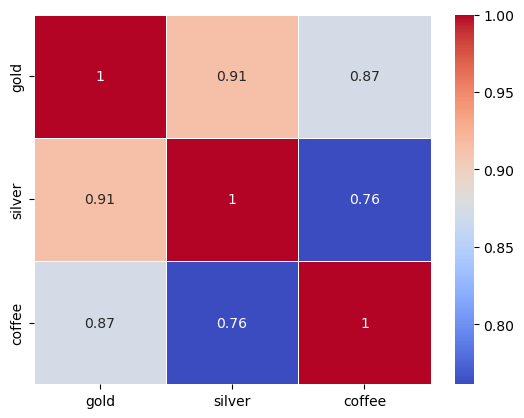

In [20]:
correlation = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
print(correlation)

Zmienna gold ma najwyższe korelacje z pozostałymi zmiennymi, zatem model Y=X1+X2 będzie najbardziej efektywny jeśli jako Y przyjmiemy zmienną gold.

In [21]:
X = data[['silver', 'coffee']]
X = sm.add_constant(X)
Y = data['gold']
print("\nWyniki modelu OLS (gold ~ silver + coffee):")
model = sm.OLS(Y, X).fit()
print(model.summary())


Wyniki modelu OLS (gold ~ silver + coffee):
                            OLS Regression Results                            
Dep. Variable:                   gold   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     953.6
Date:                śr., 02 kwi 2025   Prob (F-statistic):          8.40e-100
Time:                        12:15:06   Log-Likelihood:                -1026.4
No. Observations:                 193   AIC:                             2059.
Df Residuals:                     190   BIC:                             2069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

Skorygowany współczynnik determinacji $R^2$ wynosi w przybliżeniu $0.91$ co oznacza, że $91\%$ zmienności zmiennej Y (złota) jest wyjaśniane przez model. Oznacza to, że tylko około $9\%$ zmienności nie jest wyjaśniane przez model, co sugeruje, że nasz model jest bardzo dobry.

In [12]:
X = data[['silver']]
X = sm.add_constant(X)
Y = data['gold']
print("\nWyniki modelu OLS (gold ~ silver):")
model_silver = sm.OLS(Y, X).fit()
print(model_silver.summary())


Wyniki modelu OLS (gold ~ silver):
                            OLS Regression Results                            
Dep. Variable:                   gold   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     967.8
Date:                śr., 02 kwi 2025   Prob (F-statistic):           1.06e-76
Time:                        12:09:25   Log-Likelihood:                -1084.2
No. Observations:                 193   AIC:                             2172.
Df Residuals:                     191   BIC:                             2179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        687

Skorygowany współczynnik determinacji $R^2$ wynosi w przybliżeniu $0.83$ co oznacza, że $83\%$ zmienności zmiennej Y (złota) jest wyjaśniane przez model. Oznacza to, że tylko około $17\%$ zmienności nie jest wyjaśniane przez model, co sugeruje, że ten model jest wciąż bardzo dobry.

In [67]:
X = data[['coffee']]
X = sm.add_constant(X)
Y = data['gold']
print("\nWyniki modelu OLS (gold ~ coffee):")
model_coffee = sm.OLS(Y, X).fit()
print(model_coffee.summary())


Wyniki modelu OLS (gold ~ coffee):
                            OLS Regression Results                            
Dep. Variable:                   gold   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     608.2
Date:                śr., 02 kwi 2025   Prob (F-statistic):           2.84e-61
Time:                        12:00:29   Log-Likelihood:                -1120.1
No. Observations:                 193   AIC:                             2244.
Df Residuals:                     191   BIC:                             2251.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        972

Skorygowany współczynnik determinacji $R^2$ wynosi w przybliżeniu $0.76$ co oznacza, że $76\%$ zmienności zmiennej Y (złota) jest wyjaśniane przez model. Oznacza to, że tylko około $24\%$ zmienności nie jest wyjaśniane przez model, co sugeruje, że nasz model jest dobry.

# Wnioski:
Pierwszy model (gold ~ silver + coffee) jest najbardziej odpowiedni do przewidywania wartości złota, ponieważ ma najwyższe Adjusted $R^2$.

Model (gold ~ silver) jest również dobry, ale mniej dokładny niż (gold ~ silver + coffee).

Model (gold ~ coffee) jest najmniej dokładny spośród trzech analizowanych modeli.

# Test normalności dla wartości cen srebra

$H_0:$ Wartości cen srebra mają rozkład normalny.

$H_1:$ Wartości cen srebra mają rozkład inny niż normalny.

In [22]:
print('test Shapiro-Wilka:')
shapiro_result_silver = st.shapiro(data.silver)
print('wartość statystyki testowej: ', shapiro_result_silver.statistic)
print('p-wartość: ', shapiro_result_silver.pvalue)
print("\n")

test Shapiro-Wilka:
wartość statystyki testowej:  0.8453547954559326
p-wartość:  4.762944596017893e-13




W wykonanym teście zgodności, wartość p jest mniejsza niż 0.05, zatem hipotezę zerową należy odrzucić. 
Możemy przypuszczać, że rozkład cen srebra jest inny niż normalny. 

# Test normalności dla wartości cen kawy

$H_0:$ Wartości cen kawy mają rozkład normalny.

$H_1:$ Wartości cen kawy mają rozkład inny niż normalny.

In [24]:
print('test Shapiro-Wilka:')
shapiro_result_coffee = st.shapiro(data.coffee)
print('wartość statystyki testowej: ', shapiro_result_coffee.statistic)
print('p-wartość: ', shapiro_result_coffee.pvalue)
print("\n")

test Shapiro-Wilka:
wartość statystyki testowej:  0.9653937816619873
p-wartość:  0.00010831239342223853




W wykonanym teście zgodności, wartość p jest mniejsza niż 0.05, zatem hipotezę zerową należy odrzucić. 
Możemy przypuszczać, że rozkład cen kawy jest inny niż normalny. 

# Test na równość wariancji

$H_0:$ Wariancje wartości cen srebra i kawy są takie same

$H_1:$ Wariancje wartości cen srebra i kawy nie są takie same

In [25]:
vartest_result_coffee = st.levene(data.silver, data.coffee)
print('wartość statystyki testowej: ', vartest_result_coffee.statistic)
print('p-wartość: ', vartest_result_coffee.pvalue)
print("\n")

wartość statystyki testowej:  214.38412327894616
p-wartość:  6.94729981257217e-39




Wartość p jest mniejsza niż 0.05, zatem hipotezę zerową należy odrzucić. 
Możemy przypuszczać, że wariancje wartości cen srebra i kawy nie są takie same. Co za tym idzie odchylenia również nie są takie same.

# Test na równość średnich wartości cen srebra i kawy

$H_0:$ Średnie wartości cen srebra i kawy są takie same

$H_1:$ Średnie wartości cen srebra i kawy nie są takie same

In [26]:
ttest_result_coffee = st.ttest_ind(data.silver, data.coffee, equal_var=False, alternative='two-sided')
print('wartość statystyki testowej: ', ttest_result_coffee.statistic)
print('p-wartość: ', ttest_result_coffee.pvalue)
print("\n")

wartość statystyki testowej:  -93.619594801818
p-wartość:  5.176675855394248e-165




Wartość p jest mniejsza niż 0.05, zatem hipotezę zerową należy odrzucić. 
Możemy przypuszczać, że średnie wartości cen srebra i kawy nie są takie same.

# Test zgodności rozkładów złota i srebra

$H_0:$ Rozkłady wartości cen złota i srebra są takie same

$H_1:$ Rozkłady wartości cen złota i srebra nie są takie same

In [27]:
print('test Kołmogorowa-Smirnowa:')
kstest_result_gold_silver = st.kstest(data.gold, data.silver)
print('wartość statystyki testowej: ', kstest_result_gold_silver.statistic)
print('p-wartość: ', kstest_result_gold_silver.pvalue)

test Kołmogorowa-Smirnowa:
wartość statystyki testowej:  1.0
p-wartość:  3.126702340363196e-115


Wartość p jest mniejsza niż 0.05, zatem hipotezę zerową należy odrzucić. 
Możemy przypuszczać, że rozkłady wartości cen złota i srebra nie są takie same.